## Prueba
## Nombre: Xavier Jarro
## Materia: Simulacion

### Importacion de librerias necesarias.

In [4]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

### Metodo congruencia lineal

In [5]:
def congruencias_lineales(x, a, c, mod, iters):
    num = 0.00
    lista =[]
    #print("Metodo de Congruencias Lineales")
    #print("  n  ", " Xo ", "     Un ", "  Xn+1")
    for i in range(iters):
        #print(" ", i,"   ", x,"  ", num,"   ", x)
        x = (a * x + c) % mod
        num = round(x/mod,2)
        lista.append(num)
    return lista

def get_pos(digs):
    val1 =0
    val2 =0
    if digs%2 !=0:
        val1 = int(digs/2)
        val2 = int(digs/2)+1
    else:
        val1 = int(digs/2)
        val2 = val1
    return val1,val2

### Metodo cuadrados medios

In [6]:
def cuadrados_medios(iters, val, digs):
    lista =[]
    x0_semilla = int(val)
    aum = get_pos(digs)
    #print("ITERACIÓN", "Xn", "Xn*Xn", "Longitud","Ui","Rn")
    for i in range(iters):
        xn2= x0_semilla**2
        lon = len(str(xn2))
        ui = str(xn2)[int(lon/2)-aum[0]:int(lon/2)+aum[1]]
        rn = round(int(ui)/10**digs,2)
        #print(i, " ", x0_semilla," ",xn2, " ", lon, " ",ui, " ", rn)
        lista.append(rn)
        x0_semilla=int(ui)
    #print("   ")
    return lista

### Metodo covertir lista a diccionario

In [7]:
def convertir_dict(num_grupos, aumento, lista):
    grupos = []
    ini=0.00
    for i in range(num_grupos+1):
        grupos.append(round(ini,2))
        ini=ini+aumento
    a=0
    b=1
    rangos={}
    for i in range(len(grupos)-1):
        inf=grupos[a]
        sup=grupos[b]
        rangos.update({str(inf)+"," +str(sup):[]})
        for i in lista:
            if i==0.00:
                if i >=inf and i <=sup:
                    rangos[str(inf)+","+str(sup)].append(i)
            else:
                if i >inf and i <=sup:
                    rangos[str(inf)+","+str(sup)].append(i)
        a=b
        b=a+1
    return rangos

### Metodo chi cuadrado

In [13]:
def chi_cuadrado(lista, valor):
    n = int(mt.sqrt(len(lista)))
    dic = convertir_dict(n,1/n, lista)
    suma = 0.00
    print(" iteracion ", "      Ei ", "       Oi ", " (Oi-Ei)**2/Ei")
    for x, it in enumerate(dic.items()):
        f = ((len(it[1])-n)**2)/n
        suma+=f
        print(x, "         ", str(n)+"("+it[0]+")     ", len(it[1]),"     ", f)
    plt.hist(lista)
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title('Histograma')
    plt.show()
    
    print("")
    print("suma: ",suma)
    if suma< valor:
        return True
    else:
        return False

### Ejecucion.

CM
 iteracion        Ei         Oi   (Oi-Ei)**2/Ei
0           10(0.0,0.1)      11       0.1
1           10(0.1,0.2)      18       6.4
2           10(0.2,0.3)      12       0.4
3           10(0.3,0.4)      7       0.9
4           10(0.4,0.5)      13       0.9
5           10(0.5,0.6)      9       0.1
6           10(0.6,0.7)      7       0.9
7           10(0.7,0.8)      5       2.5
8           10(0.8,0.9)      8       0.4
9           10(0.9,1.0)      10       0.0


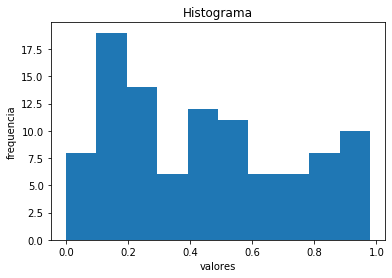


suma:  12.600000000000001

CL
 iteracion        Ei         Oi   (Oi-Ei)**2/Ei
0           10(0.0,0.1)      11       0.1
1           10(0.1,0.2)      11       0.1
2           10(0.2,0.3)      0       10.0
3           10(0.3,0.4)      22       14.4
4           10(0.4,0.5)      0       10.0
5           10(0.5,0.6)      0       10.0
6           10(0.6,0.7)      11       0.1
7           10(0.7,0.8)      11       0.1
8           10(0.8,0.9)      23       16.9
9           10(0.9,1.0)      11       0.1


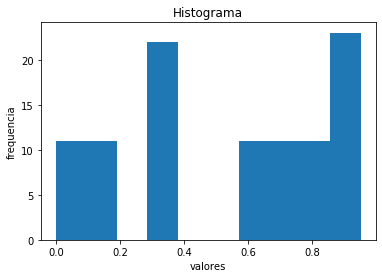


suma:  61.800000000000004


In [14]:
valor = 16.9
print("CM")
iters = 100
digs = 7
lista = cuadrados_medios(iters, 74731897457, digs)
res=chi_cuadrado(lista,valor)
print("")
print("CL")
x = 7
a = 74731897457
c = 37747318974
m = 19
lista2 = congruencias_lineales(x,a,c,m,iters)
res2 = chi_cuadrado(lista2,valor)